## Linear Regression

Linear regreesion uygulaması için kendimiz veri oluşturacağız. Bir araba şirketine düşünün. Araç fiyatları ve araçların satılma miktarları şeklinde 2 parametre olsun. Mantıken aracın fiyatı arttıkça satış miktarı azalacaktır. Aracın fiyatı düşük ise de satış miktarı daha fazla olacaktır. Bu durumda aşağıdaki gibi bir veri seti elde edeceğiz.

<br>
<img src="l1.png" align = "left" style="width:300px;height:200px"/>

Amacımız yukarıdaki noktalara en uygun line'ı bulmaktır. Bu prediction line'ını bulduktan sonra mesela araç fiyatı 5 olur ise kaç tane araç satılabilir duruma dair prediction işlemini gerçekleştirebiliriz.

Şimdi yukarıda bahsettiğim şekilde bir veri seti oluşturalım ve pytorch kütüphanesini kullanarak linear regression modelini eğitelim.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

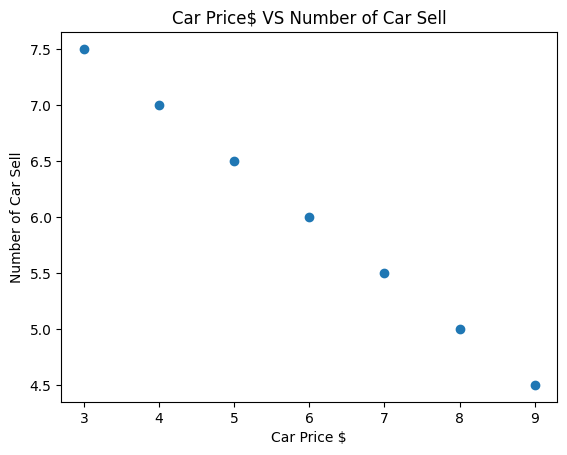

In [8]:
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

car_prices_array = [3,4,5,6,7,8,9] satırında araç fiyatları belirlenmiştir. Belirlenen fiyatlar bir liste içerisine konulmuştur.

car_price_np = np.array(car_prices_array,dtype=np.float32) satırında liste yapısı bir array'e çevrilmiştir.

car_price_np = car_price_np.reshape(-1,1) satırında reshape işlemi ile amaçlanan, reshape yapmadan önce "car_price_np.shape" sonucu (7,) 'dür. (7,) ifadesinin (7,1) şeklinde bir vektör olduğunu anlayabiliyoruz. Fakat (7,) ifadesindeki "," den sonraki boşluğa 1 yazmalıyız çünkü pytorch kütüphanesi (7,1) olmasını istemektedir. Bu amacı sağlayabilmek için .reshape(-1,1) ile (7,) deki satırlar -1'den dolayı aynen kalsın, değişmesin ve sütun sayısınıda 1 yap anlamı sağlanır. Bu satır sonucunda (7,1) elde edilir ve pytorch'un isteği formata getirilmiş olur. 

car_price_tensor = Variable(torch.from_numpy(car_price_np)) satırında araç fiyatlarının değerlerini içerisinde bulunduran bir variable define edilmiştir.

number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5] satırında ise kaç tane araç satıldığına dair bilgiler sağlanmıştır.

number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np)) satırında kaç tane araç satıldığına dair değerleri içerisinde bulunduran bir variable define edilmiştir.

Ve sonra belirlenen değerlere dair plot çizdirilmiştir.

Çıktıda görüldüğü üzere araç fiyatı arttıkça satılan araç miktarı azalmaktadır.

Uygulamamız gereken 6 adım şu şekildedir:

1- Create LinearRegression class

2- Define model from this LinearRegression class

3- MSE: Mean squared error

4- Optimization (SGD:stochastic gradient descent)

5- Backpropagation

6- Prediction

Adımları açıklayayım.

1.adımda linear regression class'ı oluşturmalıyız. Diğer kütüphanelerde class'ı kendimiz oluşturmuyorduk, hazır class'ları kullanıyorduk. Aslında yine böyle yapabiliriz ama pytorch kütüphanesi ile genellikle modeller bir tane class içerisine define ediliyor. Modelde kullanacağımız tüm parametreler class içerisine define ediliyor ve bu nedenle linear regression class'ı oluşturmalıyız. 

2.adımda ise 1.adımda oluşturduğumuz class'ı kullanarak bir tane model tanımlayacağız. Linear regression'da bulunan parametreleri eğitebilmek için bir tane error değerine sahip olmamız gerekiyor.

3.adımda mean square error yöntemini kullanarak hatalarımızı hesaplayacağız.

4.adımda 3.adımda hesaplanan hataları kullanarak parametreleri optimize etmemiz gerekiyor. Yani training işlemini gerçekleştirmemiz gerekiyor. Optimizasyon yapabilmek için stochastic gradient descent yöntemini kullanacağız. 

5.adımda backpropagation yapacağız ve training işleminin ilk adımını bitirmiş olacağız. Bu işlemi bir for döngüsünde yapacağız. Yani hem ileriye forward hemde geriye backward yapıyoruz ve bu işlemi sürekli yaparak en uygun regression line'ı yani en uygun parametleri elde edeceğiz. 

6.adımda ise prediction işlemini gerçekleştireceğiz.

Şimdi bu adımları pytorch'da nasıl yapacağımızı açıklayayım.

<br>
<img src="l2.png" align = "left" style="width:300px;height:200px"/><br>

Yanda 1.adımı görmektesiniz. 1.adımda linear regression ile ilgili bir tane class oluşturulur. Bu durumda aslında linear regression modeli oluşturuyoruz. Linear regression modeli y=wx+b 'dir. x, input parametresidir. y, output parametresidir. x ve y değerleri scaler değerlerdir yani x ve y'nin dimension değerleri 1'dir. bias, line'ın y ekseniyle kesiştiği yerdir. Weight, line'ın eğimidir. Böylelikle 1.adımda bir tane regression modeli tanımlanmıştır, class olarak oluşturulmuştur.


<br>
<img src="l3.png" align="left" style="width:200px;height:100px"/><br><br>
Yanda 2.adımı görmektesiniz. 2.adımda 1.adımda oluşturulan class kullanılarak bir tane model oluşturacağız. 

<br>
<img src="l4.png" align="left" style="width:200px;height:100px"/><br><br>
Yanda 3.adımı görmektesiniz. 3.adımda error tanımı yapılacaktır.

<br>
<img src="l5.png" align="left" style="width:300px;height:100px"/><br><br>
4.adımda stochastic gradient descent kullanarak optimizasyon işlemini gerçekleştireceğiz. Bu işlemin parametrelerinden birisi learning_rate ve bir diğer parametresi modelin parametreleri olacaktır. Bir linear regression modeline sahip olacağız ve linear regression modelinin parametreleri weight ve bias'tır. Bunlar stochastic greadient descent algoritmasının içerisinde güncellenecektir.

<br>
<img src="l6.png" align="left" style="width:300px;height:100px"/><br><br>
5.adımda back propagation yapılacaktır. Yani weight ve bias'ın güncelleneceği kısımdır.

Yani gerçekleştirilecek işlemler özetle aşağıda gördüğünüz gibidir:

<br>
<img src="l7.png" style="width:500px;height:500px"/><br><br>

Şimdi tüm bu işlemleri pytorch ile implement edelim.

epoch 0, loss 9.100751876831055
epoch 50, loss 5.9366841316223145
epoch 100, loss 4.011666774749756
epoch 150, loss 2.7108511924743652
epoch 200, loss 1.8318361043930054
epoch 250, loss 1.2378482818603516
epoch 300, loss 0.8364653587341309
epoch 350, loss 0.5652357339859009
epoch 400, loss 0.38195323944091797
epoch 450, loss 0.2581016421318054
epoch 500, loss 0.17441006004810333
epoch 550, loss 0.11785618960857391
epoch 600, loss 0.07963994890451431
epoch 650, loss 0.05381579324603081
epoch 700, loss 0.0363658182322979
epoch 750, loss 0.024573907256126404
epoch 800, loss 0.016605457291007042
epoch 850, loss 0.011221139691770077
epoch 900, loss 0.00758261838927865
epoch 950, loss 0.005123909097164869
epoch 1000, loss 0.003462545108050108


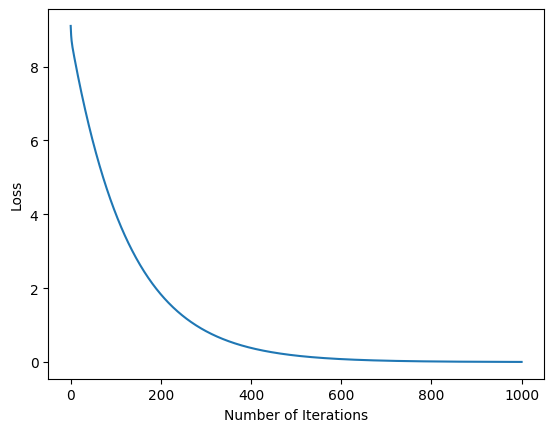

In [9]:
# step 1: create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()  
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# step 2: define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# step 3: MSE
mse = nn.MSELoss()

# step 4: Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

Şimdi prediction işlemini gerçekleştirelim.

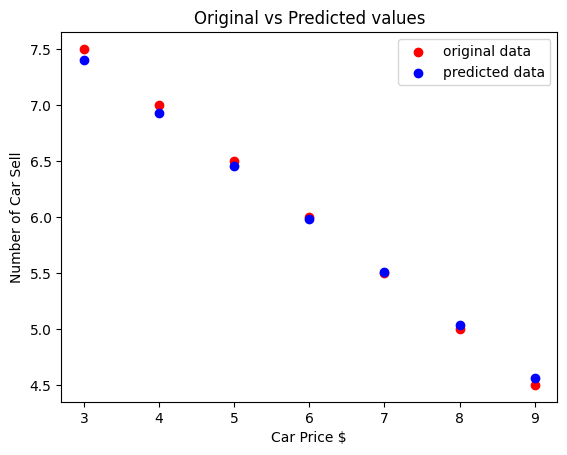

In [10]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

İterasyon sayısını artırdığımızda loss değeri giderek azalacaktır. Loss değeri azaldığında mavi ve kırmızı noktalar üst üste olacaklardır.